### 1. Read the dataset and check if anything missing

In [170]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1]:
#import necessary modules to manipulate the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [64]:
#read training and test sets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [65]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [66]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [67]:
#find nan values
print(np.sum(np.sum(train.isnull(), axis = 1)))
print(np.sum(np.sum(test.isnull(), axis = 1)))

0
0


Every sample is a 28*28 img

The first column "label" ranges from 0 to 9, which also should be the output value

No missing/NaN values in the datasets

In [68]:
#set features and labels
#features = train.iloc[:, 1:]
#label = train.iloc[:, 0]

### 2. Try DL / NN

How many processes do we need to build a NN algorithm?

    1. Activation Functions
    2. Initialization, normalization, and transpose dataset
    3. Convert muti-class labels into one hot code
    4. Initialize parameters
    5. Compute cost
    6. Set mini-batch size
    7. Build Forward-propagation process
    8. Build Back-propagation process
    9. Build Adam iteration process
    
    10. Build Validation process
    11. Create more samples with data augmentation
    
    12. Run and compare the output (compute the cost)

### 2.1 Define Activation Function

In [69]:
#first, define sigmoid, relu, and tanh activation functions

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0, x)
    return s

def tanh(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- tanh(x)
    """
    s = np.tanh(x)
    return s

In [70]:
# Since we need to recognize the images of digits from 0 to 9, we need softmax activation function in the final layer

def softmax(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- softmax(x)
    """
    summation = np.sum(np.exp(x), axis = 0)
    s = np.exp(x) / summation
    return s

## 2.2 Initialization

Before implementing neural network, the data format should be adjusted first

In [71]:
#transform features and labels into numpy arrays
X_train_ori = train.iloc[:, 1:].values
Y_train_ori = train.iloc[:, 0].values
X_test_ori = test.values
X_train_ori.shape, Y_train_ori.shape

((42000, 784), (42000,))

In [72]:
#do the transpose and normalization
def feature_norm(x):
    '''
    Normalize the feature values of x
    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    X_norm -- normalized x.T
    '''
    X_norm = x.T
    X_norm = X_norm / 255
    return X_norm

In [73]:
X_norm = feature_norm(X_train_ori)
test_norm = feature_norm(X_test_ori)
X_norm.shape, test_norm.shape

((784, 42000), (784, 28000))

In [74]:
# Y (label) need to get transformed into one hot code
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [75]:
Y_norm = convert_to_one_hot(Y_train_ori, 10)
np.sum(Y_norm, axis = 1), Y_norm.shape

(array([ 4132.,  4684.,  4177.,  4351.,  4072.,  3795.,  4137.,  4401.,
         4063.,  4188.]), (10, 42000))

In [76]:
#set random seed for consistency
np.random.seed(32)

In [77]:
#compute first layer dim and last(10)
def first_dim(x):
    '''
    Compute the neuron number of the first layer
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    m -- x.shape[1]
    '''
    m = x.shape[0]
    return m

In [78]:
m = first_dim(X_norm)
print(m)

784


In [79]:
#build a n layers layer_dim
def set_layers(n, m, last_layer = 10, seed = 32):
    '''
    Set n layers for the neural network and decide how many neurons in each layer
    Arguments:
    n -- A constant to decide build how many hidden laysers

    Return:
    layer_dims -- a list consist of neuron numbers in each layer
    '''
    np.random.seed(seed)
    layer_dims = []
    layer_dims.append(m)
    
    for i in range(n):
        layer_dims.append(np.random.randint(last_layer, m/(10*(i+1))))
    
    layer_dims.append(last_layer)
    return layer_dims

In [80]:
layer_dims = set_layers(2, m, last_layer = 10)
layer_dims

[784, 53, 15, 10]

In [81]:
#initailize parameters W, b with regularization
def initialize_parameters(layer_dims):
    '''
    Random initialization with Xavier Initialization
    '''
    #set random seed to keep consistency
    np.random.seed(32)
    #set dict to store parameters
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        #assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        #assert(parameters['b' + str(l)].shape == layer_dims[l], 1)
    
    return parameters

In [82]:
parameters = initialize_parameters(layer_dims)

## 2.3 Set Mini-batch Size and Build Forward and Back Propagation Process

In [83]:
# Mini-batch
def random_mini_batches(X, Y, mini_batch_size = 256, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- one hot vector , of shape (10, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    
    assert (shuffled_Y.shape == Y.shape)
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = m//mini_batch_size
    # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[: , k * mini_batch_size: (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[: , k * mini_batch_size: (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[: , mini_batch_size * num_complete_minibatches: m]
        mini_batch_Y = shuffled_Y[: , mini_batch_size * num_complete_minibatches: m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [84]:
# Forward Propagation
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
                    W4
                    b4
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    # retrieve parameters
    L = len(parameters) // 2
    cache = {}
    
    # LINEAR -> RELU -> ...... -> LINEAR -> SOFTMAX
    cache['z' + str(1)] = np.dot(parameters['W1'], X) + parameters['b1']
    cache['a' + str(1)] = relu(cache['z1'])
    cache['W1'] = parameters['W1']
    cache['b1'] = parameters['b1']
    for l in range(1, L-1):
        cache['z' + str(l+1)] = np.dot(parameters['W'+str(l+1)], cache['a'+str(l)]) + parameters['b'+str(l+1)]
        cache['a'+str(l+1)] = relu(cache['z' + str(l+1)])
        cache['W'+str(l+1)] = parameters['W'+str(l+1)]
        cache['b'+str(l+1)] = parameters['b'+str(l+1)]
    
    cache['z'+str(L)] = np.dot(parameters['W'+str(L)], cache['a'+str(L-1)]) + parameters['b'+str(L)]
    cache['a'+str(L)] = softmax(cache['z' + str(L)])
    cache['W'+str(L)] = parameters['W'+str(L)]
    cache['b'+str(L)] = parameters['b'+str(L)]
    
    
    return cache['a'+str(L)], cache


In [85]:
#build cost function
def compute_cost(aL, Y):
    
    """
    Implement the cost function
    
    Arguments:
    aL -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as aL (10 * m)
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    cost = (-1 / m) * np.sum(np.sum(np.multiply(Y, np.log(aL)), axis = 0))
    
    return cost

In [86]:
#softmax derivative: 
#https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- one hot matrix for multi-class labels 
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    L = len(cache) // 4
    m = X.shape[1]
    
    gradients = {}
    
    gradients['dz' + str(L)] = 1./m * (cache['a'+str(L)] - Y)
    gradients['dW' + str(L)] = np.dot(gradients['dz' + str(L)], cache['a'+str(L-1)].T)
    gradients['db' + str(L)] = np.sum(gradients['dz' + str(L)], axis=1, keepdims = True)
    
    for l in range(L-1, 1, -1):
        gradients['da' + str(l)] = np.dot(cache['W'+str(l+1)].T, gradients['dz'+str(l+1)])
        gradients['dz' + str(l)] = np.multiply(gradients['da' + str(l)], np.int64(cache['a'+str(l)] > 0))
        gradients['dW' + str(l)] = np.dot(gradients['dz' + str(l)], cache['a'+str(l-1)].T)
        gradients['db' + str(l)] = np.sum(gradients['dz' + str(l)], axis=1, keepdims = True)
        
    gradients['da1'] = np.dot(cache['W2'].T, gradients['dz2'])
    gradients['dz1'] = np.multiply(gradients['da1'], np.int64(cache['a1'] > 0))
    gradients['dW1'] = np.dot(gradients['dz1'], X.T)
    gradients['db1'] = np.sum(gradients['dz1'], axis=1, keepdims = True)
    
    return gradients

## 2.4 Setting Adam algorithm for optimization

In [87]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    ### END CODE HERE ###
    
    return v, s

In [88]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1 ** t)
        # You can't repeat the formula again since the value of v["dW" + str(l+1)] has been changed!
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1-beta2) * np.square(grads['dW' + str(l+1)])
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1-beta2) * np.square(grads['db' + str(l+1)])
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1- beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1- beta2 ** t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (
            np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (
            np.sqrt(s_corrected["db" + str(l+1)])  + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [89]:
def model(X, Y, layers_dims, optimizer = 'adam', learning_rate = 0.0005, mini_batch_size = 256, beta = 0.9,
          learning_decay = 0.001,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 300, seed = 10, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    #seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 3
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            aL, cache = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(aL, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, cache)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 10 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
            
        if print_cost and i % 1 == 0:
            costs.append(cost)
        if np.log10(cost) <= -9 : break
        learning_rate = learning_rate / (1+learning_decay)
        
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.yscale('log')
    plt.xlabel('epochs (per 1)')
    plt.title("Learning rate = " + str(learning_rate) + ', ' + 'mini_batch_size = ' + str(mini_batch_size))
    plt.show()
    print(np.log10(cost))

    return parameters

## 2.5 Run NN!

Since there are many problems while implementing mini-batch, try whole batch first

In [28]:
train_X = feature_norm(X_train_ori)
train_Y = convert_to_one_hot(Y_train_ori, 10)
layer_dims = set_layers(2, m, last_layer = 10)

Cost after epoch 0: 2.348200
Cost after epoch 10: 0.822556
Cost after epoch 20: 0.477744
Cost after epoch 30: 0.361737
Cost after epoch 40: 0.298332
Cost after epoch 50: 0.254607
Cost after epoch 60: 0.225023
Cost after epoch 70: 0.203717
Cost after epoch 80: 0.187659
Cost after epoch 90: 0.175101


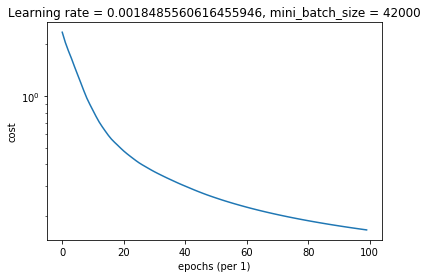

-0.780195107912


In [38]:
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.005,
                   mini_batch_size = train_X.shape[1], learning_decay = 0.01,
                   num_epochs = 100)
#0.94271

Cost after epoch 0: 2.348200
Cost after epoch 10: 0.646024
Cost after epoch 20: 0.383583
Cost after epoch 30: 0.287502
Cost after epoch 40: 0.228577
Cost after epoch 50: 0.192511
Cost after epoch 60: 0.167832
Cost after epoch 70: 0.150270
Cost after epoch 80: 0.137101
Cost after epoch 90: 0.126756
Cost after epoch 100: 0.118390
Cost after epoch 110: 0.111369
Cost after epoch 120: 0.105445
Cost after epoch 130: 0.100358
Cost after epoch 140: 0.095934


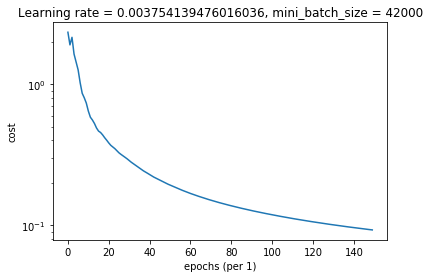

-1.0342743311


In [44]:
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.0167,
                   mini_batch_size = train_X.shape[1], learning_decay = 0.01,
                   num_epochs = 150)
#0.95585

Cost after epoch 0: -1.195061
Cost after epoch 5: -1.110771
Cost after epoch 10: -2.094027
Cost after epoch 15: -2.233369
Cost after epoch 20: -1.202261
Cost after epoch 25: -3.314280
Cost after epoch 30: -3.660486
Cost after epoch 35: -2.968145
Cost after epoch 40: -5.140485
Cost after epoch 45: -4.577657
Cost after epoch 50: -4.795420
Cost after epoch 55: -4.582444
Cost after epoch 60: -4.677801
Cost after epoch 65: -6.242573
Cost after epoch 70: -5.461031
Cost after epoch 75: -4.759324
Cost after epoch 80: -5.567504
Cost after epoch 85: -3.220391
Cost after epoch 90: -4.275762
Cost after epoch 95: -4.931747


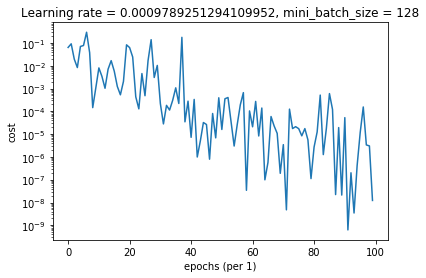

-7.90973020004


In [199]:
parameters = model(train_X, train_Y, layer_dims, optimizer = 'adam', learning_rate = 0.00250, 
                   learning_decay = 0.00942,
                   mini_batch_size = 128, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  
                   epsilon = 1e-8, num_epochs = 100, print_cost = True)

#0.97057

Cost after epoch 0: 0.891992
Cost after epoch 10: 0.144779
Cost after epoch 20: 0.083543
Cost after epoch 30: 0.054696
Cost after epoch 40: 0.039167
Cost after epoch 50: 0.025854
Cost after epoch 60: 0.018329
Cost after epoch 70: 0.012115
Cost after epoch 80: 0.008740
Cost after epoch 90: 0.006350
Cost after epoch 100: 0.003516
Cost after epoch 110: 0.003598
Cost after epoch 120: 0.002651
Cost after epoch 130: 0.001902
Cost after epoch 140: 0.001665
Cost after epoch 150: 0.001601
Cost after epoch 160: 0.001219
Cost after epoch 170: 0.001108
Cost after epoch 180: 0.001079
Cost after epoch 190: 0.000878


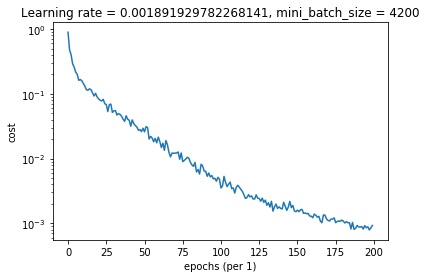

-3.03303926697


In [53]:
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.00513,
                   mini_batch_size = int(train_X.shape[1]/10), learning_decay = 0.005,
                   num_epochs = 200)
#0.96542

Cost after epoch 0: 0.478312
Cost after epoch 10: 0.067373
Cost after epoch 20: 0.035165
Cost after epoch 30: 0.014133
Cost after epoch 40: 0.006181
Cost after epoch 50: 0.004290
Cost after epoch 60: 0.002054
Cost after epoch 70: 0.001105
Cost after epoch 80: 0.001337
Cost after epoch 90: 0.000612
Cost after epoch 100: 0.000509
Cost after epoch 110: 0.000690
Cost after epoch 120: 0.000508
Cost after epoch 130: 0.000272
Cost after epoch 140: 0.000257
Cost after epoch 150: 0.000269
Cost after epoch 160: 0.000247
Cost after epoch 170: 0.000256
Cost after epoch 180: 0.000267
Cost after epoch 190: 0.000219


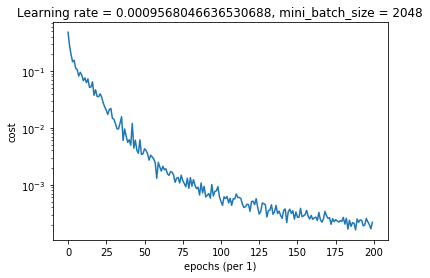

-3.66037066953


In [62]:
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.007,
                   mini_batch_size = 2048, learning_decay = 0.01,
                   num_epochs = 200)
#0.96300

[784, 68, 37, 10]
Cost after epoch 0: 0.486092
Cost after epoch 10: 0.070487
Cost after epoch 20: 0.027688
Cost after epoch 30: 0.010519
Cost after epoch 40: 0.002995
Cost after epoch 50: 0.001996
Cost after epoch 60: 0.001829
Cost after epoch 70: 0.000761
Cost after epoch 80: 0.001390
Cost after epoch 90: 0.000676
Cost after epoch 100: 0.000720
Cost after epoch 110: 0.001072
Cost after epoch 120: 0.000832
Cost after epoch 130: 0.000530
Cost after epoch 140: 0.000539
Cost after epoch 150: 0.000572
Cost after epoch 160: 0.000522
Cost after epoch 170: 0.000443
Cost after epoch 180: 0.000785
Cost after epoch 190: 0.000629


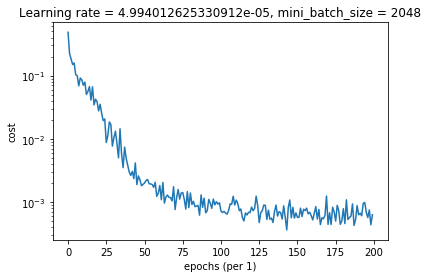

-3.19997343033


In [73]:
layer_dims = set_layers(2, m, last_layer = 10, seed = 150)
print(layer_dims)
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.033,
                   mini_batch_size = 2048, learning_decay = 0.033,
                   num_epochs = 200)
#0.95871

[784, 74, 13, 22, 10]
Cost after epoch 0: 0.613082
Cost after epoch 10: 0.074964
Cost after epoch 20: 0.037727
Cost after epoch 30: 0.015720
Cost after epoch 40: 0.009467
Cost after epoch 50: 0.011934
Cost after epoch 60: 0.009671
Cost after epoch 70: 0.004354
Cost after epoch 80: 0.006117
Cost after epoch 90: 0.003878


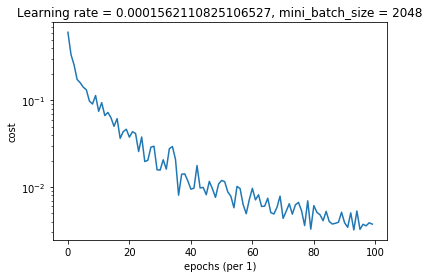

-2.42781763417


In [102]:
layer_dims = set_layers(3, m, last_layer = 10, seed = 41)
print(layer_dims)
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.00591,
                   mini_batch_size = 2048, learning_decay = 0.037,
                   num_epochs = 100)

So, the mini-batch process is correct, but when the batch size is too small, the cost would shake dramatically. Also, I suppose the data size limits the accuracy, so no matter how I changed the layers, neurons of each layer, learning rate, and learning decay rate, the cost went unstable when hit 10^(-3). If data augmentation is applied and database is enlarged, we might get better accuracy. Also, validation process should be built to compare which algorithms performs better.

## 2.6 Data Augmentation

In [90]:
train_X = X_train_ori
train_Y = Y_train_ori

1
9
2
9
2
2
4
1
9


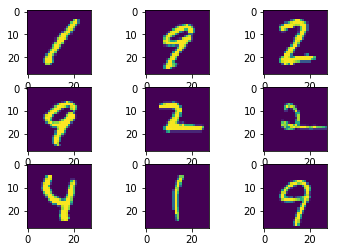

In [91]:
from keras.preprocessing.image import ImageDataGenerator # for data augmentation
import csv
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i*11].reshape((28, 28)))
    print(train_Y[i*11])
plt.show()

In [92]:
train_X = train_X.reshape(train_X.shape[0], 1, 28, 28)
train_X = train_X.astype('float32')

In [93]:
# more kinds of augmentation can be found at https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(zoom_range=0.017,
                             width_shift_range=0.07,
                             height_shift_range=0.07,
                             rotation_range=13)
datagen.fit(train_X)

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/keras/preprocessing/image.py:685: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (42000, 1, 28, 28) (28 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [94]:
filename = "data/new_image_data.csv"
new_data = [] #store new images
new_label = [] #store the lable of new images

In [95]:
#output new images into CSV
def write_to_csv(original_data, label, filename):
    for i in range(0, len(original_data)):
        pre_process = original_data[i].reshape((28*28,1))
        single_pic = []
        single_pic.append(label[i])
        for j in range(0,len(pre_process)):
            temp_pix = pre_process[j][0]
            single_pic.append(temp_pix)
        with open(filename,"a") as f:
            f_csv = csv.writer(f, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
            f_csv.writerow(single_pic)

In [96]:
number_of_batches = 2000
batches = 0

for X_batch, Y_batch in datagen.flow(train_X, train_Y.T, batch_size=10):
    new_data.append(X_batch)
    new_label.append(Y_batch) 
#         loss = model.train(X_batch, Y_batch)
    batches += 1
    if batches >= number_of_batches:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/keras/preprocessing/image.py:857: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (42000, 1, 28, 28) (28 channels).
  ' (' + str(self.x.shape[channels_axis]) + ' channels).')


1
9
9
4


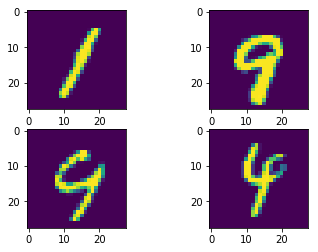

In [97]:
#show the new images
for i in range(0, 4):
    plt.subplot(2,2,i+1)
    plt.imshow(new_data[333][i].reshape((28, 28)))
    print(new_label[333][i])
    # show the plot
plt.show()

In [98]:
len(new_data), len(new_data[0])

(2000, 10)

In [99]:
#write new images into CSV
for i in range(0,len(new_data)):
    write_to_csv(new_data[i], new_label[i], filename)

## 2.7 Implement NN with data augmentation

In [100]:
new_train = pd.read_csv('data/new_image_data.csv', index_col = False)
new_train.head(15)

,8,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,...,0.0.642,0.0.643,0.0.644,0.0.645,0.0.646,0.0.647,0.0.648,0.0.649,0.0.650,0.0.651
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
new_train.columns = train.columns
new_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#reset training and test datasets
del(X_train_ori)
del(Y_train_ori)
del(X_norm)
del(test_norm)
del(Y_norm)
del(new_data)
del(new_label)
del(train_X)
del(train_Y)

In [103]:
#Merge 2 diff training sets and implement normalization
#Then rerun NN

training = train.append(new_train, ignore_index = True)
print(np.sum(np.sum(training.isnull(), axis = 1)))

0


In [104]:
#remove train and new_train to release space
del(train)
del(new_train)

In [105]:
training.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,61999.000000,61999.0,61999.0,61999.0,61999.0,61999.0,61999.0,61999.000000,61999.000000,61999.000000,...,61999.000000,61999.000000,61999.000000,61999.000000,61999.000000,61999.000000,61999.000000,61999.0,61999.0,61999.0
mean,4.459346,0.0,0.0,0.0,0.0,0.0,0.0,0.003548,0.018355,0.021984,...,0.569251,0.341199,0.202568,0.084195,0.043920,0.015274,0.000048,0.0,0.0,0.0
std,2.887448,0.0,0.0,0.0,0.0,0.0,0.0,0.505226,1.918234,2.160333,...,10.585790,8.112557,6.344911,3.905284,2.749805,1.541707,0.012048,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,85.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,254.000000,254.000000,252.000000,3.000000,0.0,0.0,0.0


In [106]:
training['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [107]:
X_train_ori = training.iloc[:, 1:].values
Y_train_ori = training.iloc[:, 0].values
X_test_ori = test.values
X_train_ori.shape, Y_train_ori.shape

((61999, 784), (61999,))

In [108]:
test_norm = feature_norm(X_test_ori)

In [114]:
train_X = feature_norm(X_train_ori)
train_Y = convert_to_one_hot(Y_train_ori, 10)
layer_dims = [784, 90, 33, 10]

Cost after epoch 0: 0.265565
Cost after epoch 10: 0.018500
Cost after epoch 20: 0.003013
Cost after epoch 30: 0.000852
Cost after epoch 40: 0.000884
Cost after epoch 50: 0.000490
Cost after epoch 60: 0.000357
Cost after epoch 70: 0.000262
Cost after epoch 80: 0.000341
Cost after epoch 90: 0.000183


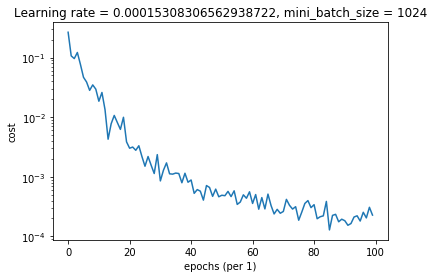

-3.64255157913


In [119]:
#try whole batch first
parameters = model(train_X, train_Y, layer_dims, optimizer = "adam", learning_rate = 0.00531,
                   mini_batch_size = 1024, learning_decay = 0.0361,
                   num_epochs = 100)

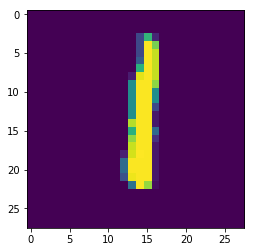

1


In [111]:
plt.imshow(np.multiply(train_X.T[57839], 255).reshape(28,28))
plt.show()
print(np.argmax(train_Y.T[57839]))

## 2.8 Introduce Cross-Validation

In [145]:
X_train_ori.shape, Y_train_ori.shape

((61999, 784), (61999,))

In [146]:
from sklearn.model_selection import train_test_split
def validation_split(train_X, train_Y, seed = np.random.randint(0, 100)):
    train_f, validation_f, train_l, validation_l = train_test_split(train_X, train_Y, 
                                                                    test_size = 6000,
                                                                    random_state = seed)
    return train_f, validation_f, train_l, validation_l

In [148]:
train_X, validation_X, train_Y, validation_Y = validation_split(X_train_ori, Y_train_ori, 
                                                                seed = np.random.randint(0, 100))
train_X.shape, train_Y.shape, validation_X.shape, validation_Y.shape

((55999, 784), (55999,), (6000, 784), (6000,))

In [149]:
#Normalization
train_X = feature_norm(train_X)
validation_X = feature_norm(validation_X)
train_Y = convert_to_one_hot(train_Y, 10)

In [150]:
#compute validation accuracy!
def validation_accuracy(validation_X, parameters, validation_Y):
    '''
    Whenever an iteration is over, check the validation accuracy and see if it is improving.
    Arguments:
    validation_X -- validation input data
    parameters -- forward propagation parameters updated from each iteration
    validation_Y -- validation label data
    
    Returns:
    Error_rate -- validation set accuracy
    '''
    Y_hat, _ = forward_propagation(validation_X, parameters)
    prediction = np.argmax(Y_hat.T, axis = 1)
    accuracy = np.equal(prediction, validation_Y).sum() / 6000.
    error_rate = 1-accuracy
    return error_rate

In [161]:
def model_validation(X, Y, layers_dims, optimizer = 'adam', learning_rate = 0.005, mini_batch_size = 2048, 
                     beta = 0.9, learning_decay = 0.001, beta1 = 0.9, beta2 = 0.999,  
                     epsilon = 1e-8, num_epochs = 50, seed = 10, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- original data (number of examples, number of pixels)
    Y -- number from 0 to 9 (number of examples, 1)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    #seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    error_rates = []                 # to keep track of validation error rates
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        #train validation split
        train_X, validation_X, train_Y, validation_Y = validation_split(X, Y, 
                                                                seed = np.random.randint(0, 100))
        #normalization
        train_X = feature_norm(train_X)
        validation_X = feature_norm(validation_X)
        train_Y = convert_to_one_hot(train_Y, 10)
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 3
        minibatches = random_mini_batches(train_X, train_Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            aL, cache = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(aL, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, cache)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        #compute validation error rate
        error_rate = validation_accuracy(validation_X, parameters, validation_Y)
        
        
        # Print the cost every 1000 epoch
        if print_cost and i % 10 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
            print ('Validation error after epoch %i: %f' %(i, error_rate))
        if print_cost and i % 1 == 0:
            costs.append(cost)
            error_rates.append(error_rate)
        if np.log10(cost) <= -9 : break
        learning_rate = learning_rate / (1+learning_decay)
        
                
    # plot the cost
    plt.plot(costs)
    plt.plot(error_rates)
    plt.ylabel('cost')
    plt.yscale('log')
    plt.xlabel('epochs (per 1)')
    plt.title("Learning rate = " + str(learning_rate) + ', ' + 'mini_batch_size = ' + str(mini_batch_size))
    plt.legend()
    plt.show()
    print(cost, error_rate)

    return parameters

Cost after epoch 0: 0.721377
Validation error after epoch 0: 0.195500
Cost after epoch 10: 0.119697
Validation error after epoch 10: 0.036667
Cost after epoch 20: 0.064105
Validation error after epoch 20: 0.017667
Cost after epoch 30: 0.036628
Validation error after epoch 30: 0.009333
Cost after epoch 40: 0.022311
Validation error after epoch 40: 0.004667
Cost after epoch 50: 0.014411
Validation error after epoch 50: 0.002000


/Users/KunWuYao/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


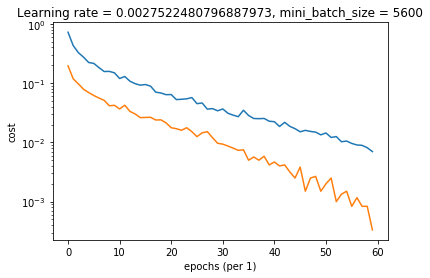

0.00699247859208 0.000333333333333


In [163]:
layer_dims = [784, 90, 33, 10]
parameters = model_validation(X_train_ori, Y_train_ori, layer_dims, optimizer = 'adam', 
                 learning_rate = 0.005, mini_batch_size = 55999//10 + 1, 
                 beta = 0.9, learning_decay = 0.01, beta1 = 0.9, beta2 = 0.999,  
                 epsilon = 1e-8, num_epochs = 60, seed = 10, print_cost = True)
#0.97100

Cost after epoch 0: 0.276065
Validation error after epoch 0: 0.113000
Cost after epoch 10: 0.052260
Validation error after epoch 10: 0.016000
Cost after epoch 20: 0.030112
Validation error after epoch 20: 0.002833
Cost after epoch 30: 0.003999
Validation error after epoch 30: 0.000167
Cost after epoch 40: 0.001901
Validation error after epoch 40: 0.000000


/Users/KunWuYao/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


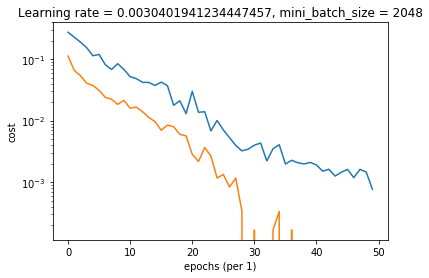

0.000769176552177 0.0


In [164]:
layer_dims = [784, 97, 37, 10]
parameters = model_validation(X_train_ori, Y_train_ori, layer_dims, optimizer = 'adam', 
                 learning_rate = 0.005, mini_batch_size = 2048, 
                 beta = 0.9, learning_decay = 0.01, beta1 = 0.9, beta2 = 0.999,  
                 epsilon = 1e-8, num_epochs = 50, seed = 10, print_cost = True)
#0.97500

Cost after epoch 0: 0.281975
Validation error after epoch 0: 0.088500
Cost after epoch 10: 0.028476
Validation error after epoch 10: 0.009833
Cost after epoch 20: 0.009898
Validation error after epoch 20: 0.002000
Cost after epoch 30: 0.001108
Validation error after epoch 30: 0.000000
Cost after epoch 40: 0.000662
Validation error after epoch 40: 0.000000


/Users/KunWuYao/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


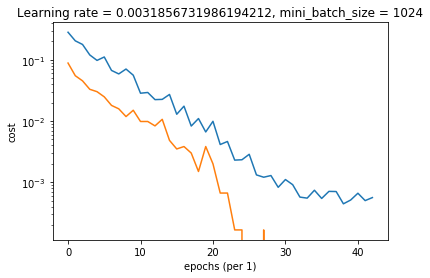

0.000562359802016 0.0


In [169]:
layer_dims = [784, 103, 41, 10]
parameters = model_validation(X_train_ori, Y_train_ori, layer_dims, optimizer = 'adam', 
                 learning_rate = 0.0043, mini_batch_size = 1024, 
                 beta = 0.9, learning_decay = 0.007, beta1 = 0.95, beta2 = 0.999,  
                 epsilon = 1e-8, num_epochs = 43, seed = 10, print_cost = True)
#0.97514

Cost after epoch 0: 0.493499
Validation error after epoch 0: 0.142667
Cost after epoch 10: 0.046184
Validation error after epoch 10: 0.013500
Cost after epoch 20: 0.031161
Validation error after epoch 20: 0.003667
Cost after epoch 30: 0.001215
Validation error after epoch 30: 0.000000
Cost after epoch 40: 0.000503
Validation error after epoch 40: 0.000000
Cost after epoch 50: 0.000173
Validation error after epoch 50: 0.000000


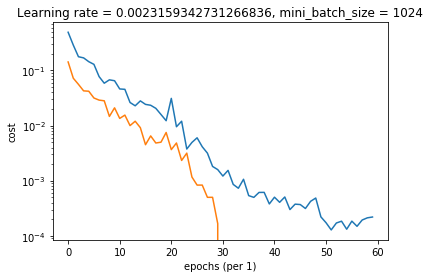

0.000219661454005 0.0


In [180]:
layer_dims = [784, 103, 41, 19, 10]
parameters = model_validation(X_train_ori, Y_train_ori, layer_dims, optimizer = 'adam', 
                 learning_rate = 0.00331, mini_batch_size = 1024, 
                 beta = 0.9, learning_decay = 0.00597, beta1 = 0.95, beta2 = 0.999,  
                 epsilon = 1e-8, num_epochs = 60, seed = 10, print_cost = True)
#0.97585

### Mistake on Applying Cross-Validation
Here I did something wrong: I should not redo data split in each iteration.
From the last three tries we can observe that the validation error kept droping, and hit 0 after around 30 iterations and kept in 0. I think the main reason is that since I did reshuffle in each iteration, the data of validation set were also put into training and tuning, so the tuned parameters would adapt the validation set through iterations.

## 3 Make Prediction

In [177]:
Y_hat, _ = forward_propagation(test_norm, parameters)
Y_hat.shape

(10, 28000)

In [178]:
prediction = np.argmax(Y_hat.T, axis = 1)

In [179]:
#print it out!
output = pd.DataFrame(prediction, columns = ['Label']).reset_index()
output.rename(columns = {'index': 'ImageId'}, inplace = True)
output.iloc[:, 0] += 1
output.to_csv('DL_augment.csv', index = False)
